Some diagnostic plots are available where I attempt to color the embedding by a suitable scalar
pointwise evaluation of some kind.

In [1]:
import drnb.embed.pipeline as pl

umap = pl.create_pipeline(
    method=pl.embedder(
        "umap",
    ),
    plot=dict(
        figsize=(9, 6),
        color_by=pl.diag_plots(),
        extras=pl.extra_plots(),
    ),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    export=False,
    verbose=False,
)

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[19:50:19] INFO     Loading faiss with AVX2 support.                                   ]8;id=334573;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=51218;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#110\110]8;;\

           INFO     Successfully loaded faiss with AVX2 support.                       ]8;id=468595;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py\loader.py]8;;\:]8;id=470315;file:///home/james/dev/drnb3/.venv/lib/python3.12/site-packages/faiss-1.9.0-py3.12.egg/faiss/loader.py#112\112]8;;\

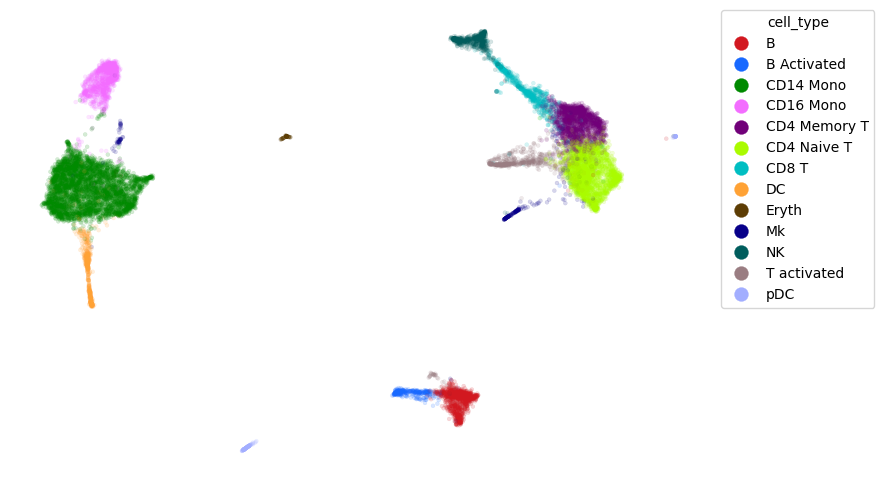

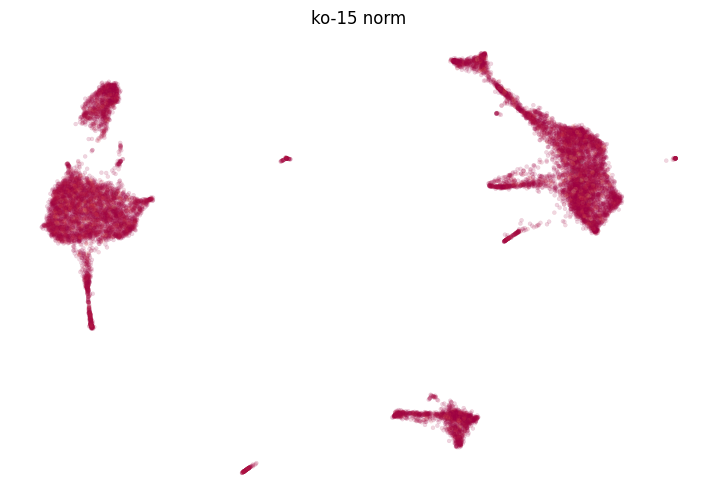

<Figure size 640x480 with 0 Axes>

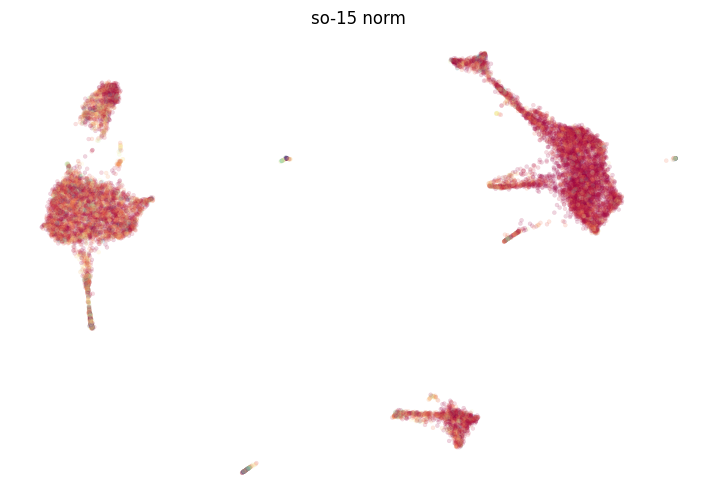

<Figure size 640x480 with 0 Axes>

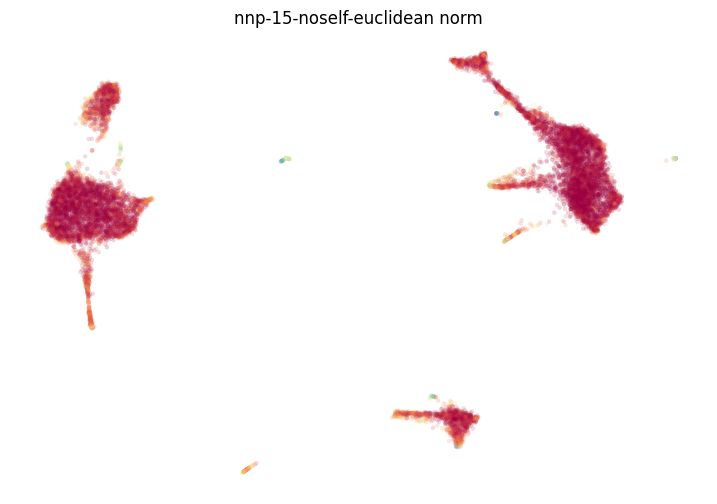

<Figure size 640x480 with 0 Axes>

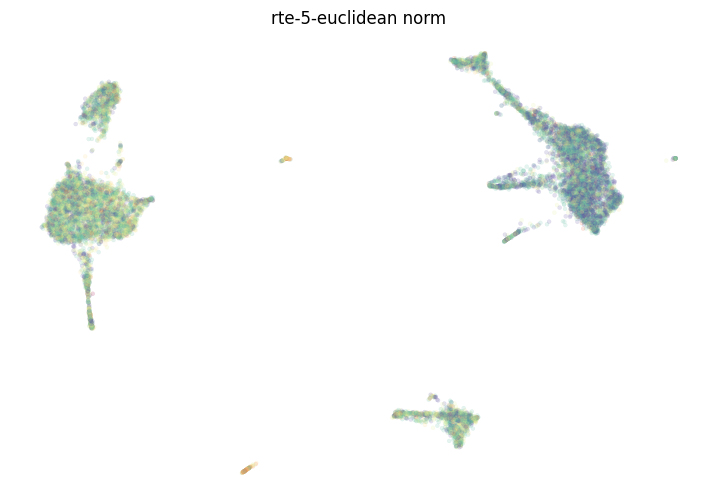

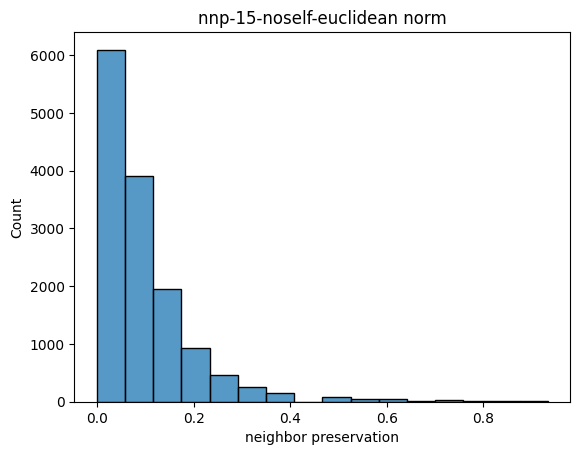

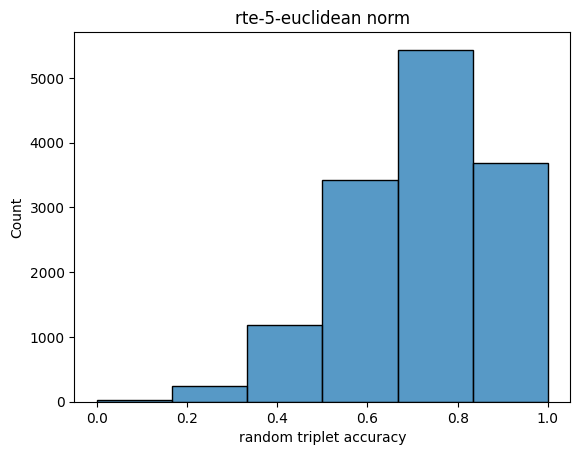

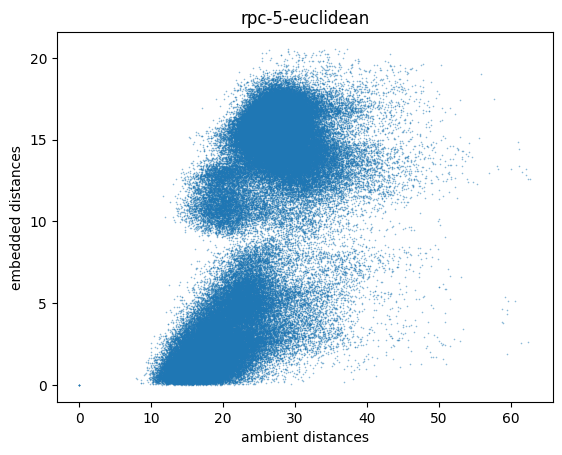

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.7582255875419672), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.6634146), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.08006762387789604), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14375169654975356), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.23705121794413886), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [2]:
umap.run("kang")["evaluations"]

There is a similar "action config" syntax for the extra diagnostic plots if you want to control
their behavior: provide the name of the plot and then a dictionary of attributes. Below the random
pair distance scatterplot has a best fit line added by isotonic regression. 

/home/james/dev/drnb3/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


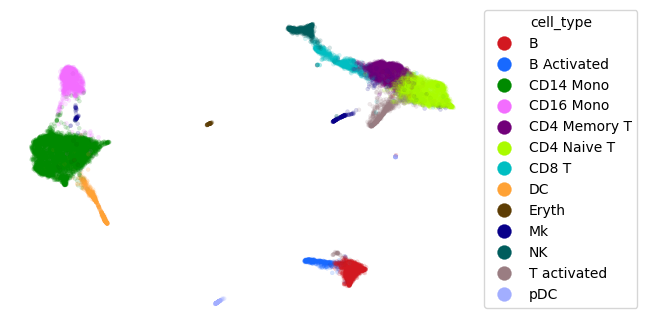

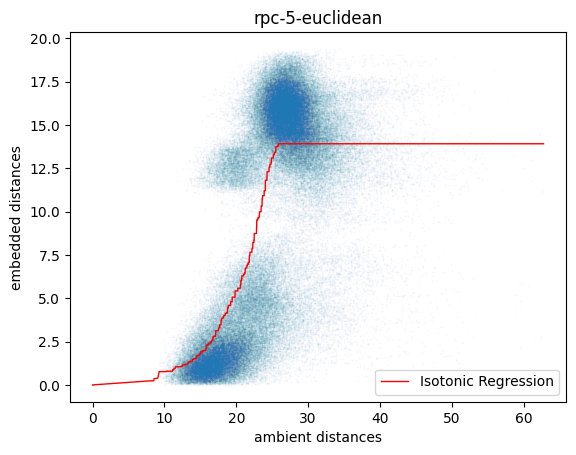

In [ ]:
_ = pl.create_pipeline(
    method=pl.embedder(
        "umap",
    ),
    plot=dict(
        extras=[("rpscatter", dict(alpha_scale=0.05, show_isotonic=True))],
    ),
).run("kang")


By default, the axes are no longer shown on standard embedding plots. You can bring them back
by passing an argument to `extra_plot`. In the `gaussian-linear` case it's also useful to enforce
an equal aspect ratio by setting `equal_axes=True`. In most cases not involving synthetic data,
this is not an issue in practice.

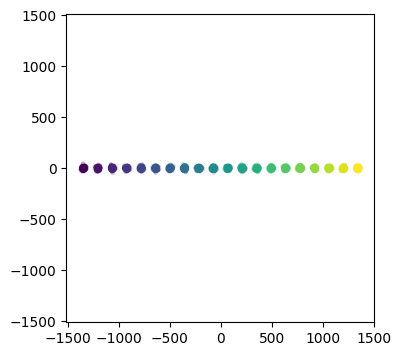

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.9956200000000001), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.999754), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.051886666666666664), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.146972), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.36933866666666665), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [4]:
pl.standard_eval(
    method="pca",
    dataset="gaussian-linear",
    extra_plot={"show_axes": True, "equal_axes": True},
)